# Recurrence relations

In this post we build on prior post on [dynamic systems with limited memory](https://jermwatt.github.io/control-notes/posts/dynamic_systems_limited_memory/dynamic_systems_limited_memory.html) and discuss examples of common *recursive* dynamic systems.  Such systems are used throughout various science and engineering disciplines and go by many names, including *recurrence relations* (of course), *difference equations*, *limited memory dynamical systems*, and *chaotic systems*, to name just a few. 

You can skip around this document to particular subsections via the hyperlinks below.

-  [What is a recurrence relation?](#recurrence-relations)
-  [Examples of recurrence relations](#recurrence-relations-examples)
-  [The "limited memory" of recurrence relations](#limited-memory)

In [ ]:
## This code cell will not be shown in the HTML version of this notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

# autoreload for updating any backend files
%load_ext autoreload
%autoreload 2

<a id='recurrence-relations'></a>
## What is a recurrence relation?

A [dynamic system with limited memory](https://jermwatt.github.io/control-notes/posts/dynamic_systems_limited_memory/dynamic_systems_limited_memory.html) takes in an input sequence $x_1,\,x_2,\,...,x_P$ and produces a corresponding output sequence $h_1,\,h_2,\,...,h_P$.  As we have seen, this output sequence is some filtered (e.g., [smoothed](https://blog.dgsix.com/posts/moving_averages/Moving_averages.html)) version of the original input, like the moving average.  In general at each step we transform a window of $D$ consecutive elements of the input as

\begin{equation}
h_{p} = f\left(x_{p-1},x_{p-2},\cdots,x_{p-D}\right)
\end{equation}

where $f$ is a function of our choosing.

A special instance of this kind of relationship, called  a *generative model* or *recurrence relation*, simply defines an input sequence *in terms of itself* in the same sort of fashion as

\begin{equation}
x_{p} = f\left(x_{p-1},x_{p-2},...,x_{p-D}\right).
\end{equation}

In other words, we do not *begin* with an input sequence, instead we *generate* one by *recursing* on a set of formulae of the form above.  

<a id='recurrence-relations-examples'></a>
## Examples of recurrence relations

Before diving into any more formal details, lets examine a few examples of recurrence relations.

#### <span style="color:#a50e3e;">Example 1. </span>  Exponential growth modeling

The simple generative model / recurrence relation of order $D = 1$ is generated by setting an *initial condition* $x_1 = \gamma$ for some constant $\gamma$, and the recursing linearly for $p > 1$ as

\begin{equation}
x_{p} = w_0 + w_1x_{p-1}.
\end{equation}

Such a generated sequence exhibits *exponential growth*, and so this system is often used for exponential growth modeling.  Note here that $\gamma$, $w_0$, and $w_1$ are constants which we can set to any values we please, however their values significantly alter the trajectory of a sequence generated by such a system (as we explore below).

Below we show two example sequences of length $P = 10$.  In the first, shown in the left panel below, we set the initial condition $x_1 = 2$ and $w_0 = 0$ and $w_1 = 2$.  Note while each point in the sequence increases *linearly* from step to step, the data overall is increasing exponentially upwards.  In the right panel we use an initial condition of $x_1 = 1$ with $w_0 = -2$ and $w_1 = 2$.  This data - while decreasing linearly at each step - globally is decreasing exponentially.

<IPython.core.display.Javascript object>


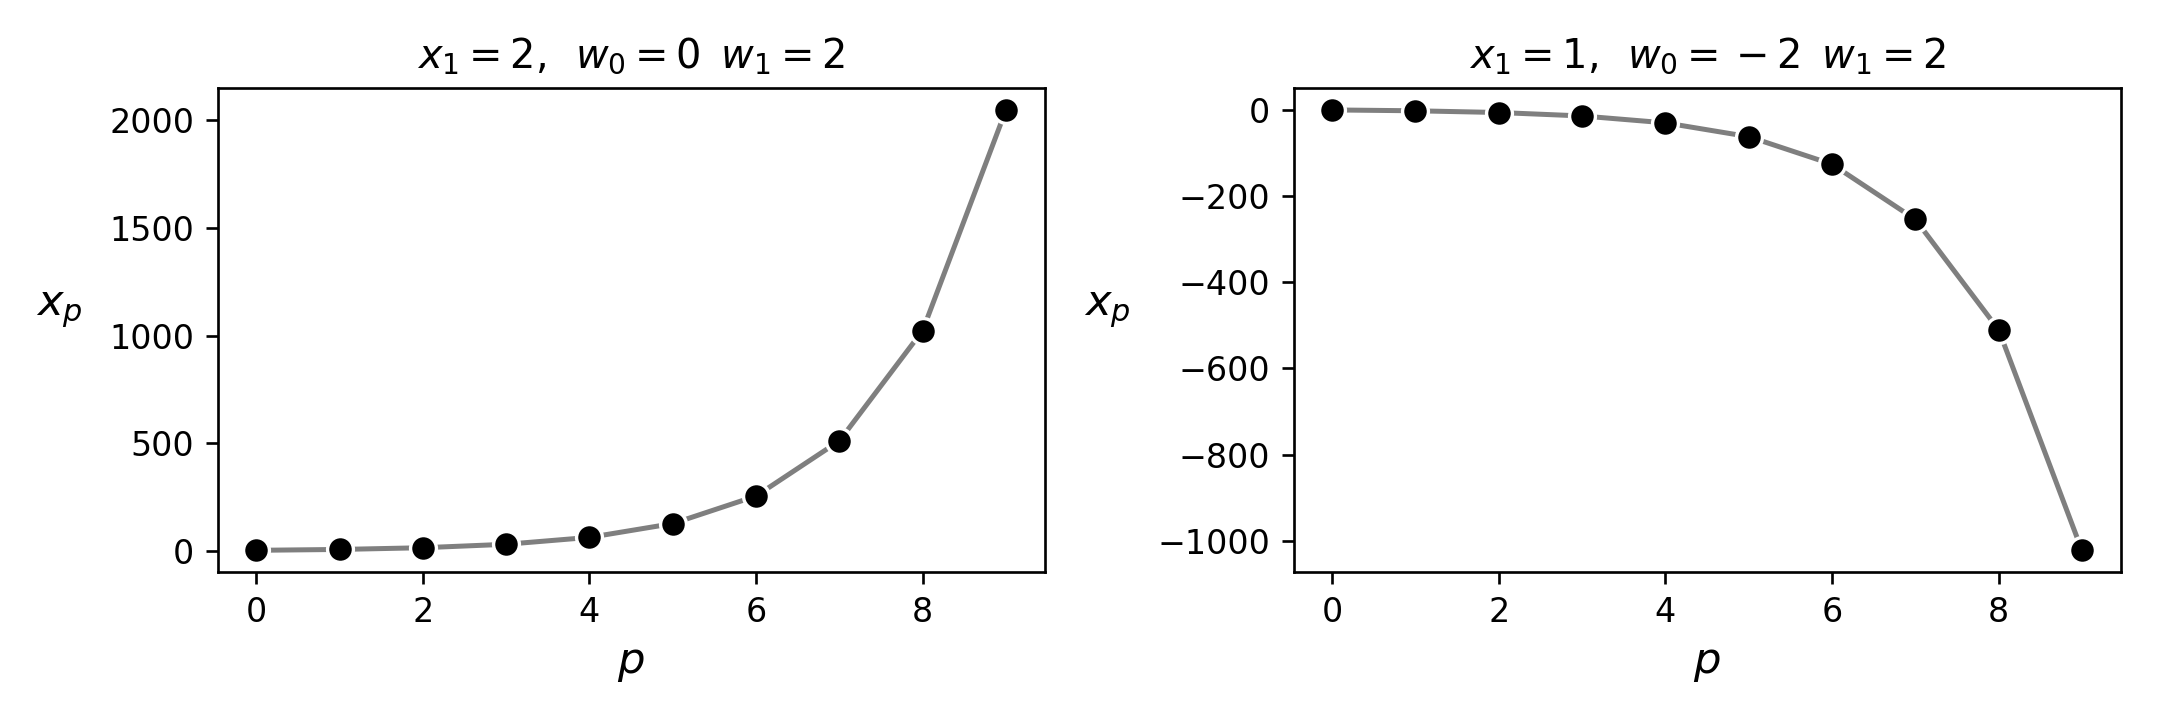

In [8]:
## This code cell will not be shown in the HTML version of this notebook
# function for exponential growth
def exponential_growth(x):
    return w_0 + w_1*x

# create a logistic sequence via for loop
num_elements = 10              # number of points to generate
sequence1 = []                 # container for generated points
x = 2                          # our initial point
w_0 = 0; w_1 = 2;
for i in range(num_elements):
    x = exponential_growth(x)
    sequence1.append(x)
    
sequence2 = []                 # container for generated points
x = 1                          # our initial point
w_0 = -2; w_1 = 2;
for i in range(num_elements):
    x = exponential_growth(x)
    sequence2.append(x)
    
### plot the result ###
fig = plt.figure(figsize = (9,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0]);
ax2 = plt.subplot(gs[1]); 

# scatter data
ax1.scatter(np.arange(len(sequence1)),sequence1,c = 'k',edgecolor = 'w',s = 60,linewidth = 1,zorder = 3);
ax2.scatter(np.arange(len(sequence2)),sequence2,c = 'k',edgecolor = 'w',s = 60,linewidth = 1,zorder = 3);
ax1.plot(sequence1,alpha = 0.5,c = 'k');
ax2.plot(sequence2,alpha = 0.5,c = 'k');  # plot lines connecting consecutive points for visualization purposes

# label axes
ax1.set_xlabel(r'$p$',fontsize = 13)
ax1.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
ax1.set_title(r'$x_1 = 2,\,\,\,w_0 = 0\,\,\,w_1 = 2$')
ax2.set_xlabel(r'$p$',fontsize = 13)
ax2.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
ax2.set_title(r'$x_1 = 1,\,\,\,w_0 = -2\,\,\,w_1 = 2$')
plt.show()

You can see algebraically how the update step above leads to exponential behavior by 'rolling back' the formula to its initial condition at a given value of $p$.  For example, say $w_0 = 0$ in the general exponential growth model above i.e., that our system takes the form

\begin{equation}
\begin{array}
\
x_1 = \gamma \\
x_{p} = w_1x_{p-1}.
\end{array}
\end{equation}

Then if we roll back the update step - replacing $x_{p-1}$ with its update - we can write the update step above for $x_p$ as 

\begin{equation}
x_{p} = w_1x_{p-1} = w_1 \cdot w_1 x_{p-2} = w_1^2x_{p-1}.
\end{equation}

If we continue, substituting in the update formula for $x_{p-2}$ and then likewise $x_{p-3}$ and so forth we can write the formula above equivalently as 

\begin{equation}
x_{p} = w_1^{\,p-1} \,x_{1}^{\,}
\end{equation}

which does indeed show how the sequence behaves exponentially depending on the coefficient value $w_1$.  Setting $w_0 \neq 0$ one can show a similar exponential relationship throughout the sequence by similarly rolling back to the initial condition.

This kind of dynamic system is precisely what we use when calculating *compound interest* on a loan.  For example, the run shown in the left panel above (could be interpreted (if we suppose $p$ has a unit of weeks and $x_p$ dollars) as showing the total amount owed on a loan of $x_1 = \$2$ at an interest rate of $100\%$ ($w_1 = 2$) per week over the period of $10$  weeks.  This kind of ridiculous high interest loan is often made by 'loansharks' in the movies, and by predatory 'payday loan' shops in the real world.

More generally the formula for compound interest (when none of the principal or interest is repaid at each period) on an initial loan of $x_1$ dollars is a version of the linear growth model above

\begin{equation}
x_{p} = \left(1 + \text{interest rate}\right)x_{p-1}.
\end{equation}

In other words, it is the exponential growth model with $w_0 = 0$ and $w_1 = \left(1 + \text{interest rate}\right)$.

This sort of model is also used as a simple model for uncapped *population growth*.  For example, suppose a single species of creature (bacteria, bunny rabbits, humans, whatever) live alone on a planet that has an infinite amount of space, resources, etc.,  Suppose at the start of the universe there are $2$ creatures, and after each period of time (e.g., a day) they reproduce at a rate of $100\%$.  Since there are infinite resources in this universe they can go on reproducing forever, reproducing at an exponential rate.  This scenario can also be interpreted as the example in the left panel above (where $x_1 = 2$ denotes the initial number of creatures and $w_1 = 2$ the growth rate).  

Just like compound interest, the uncapped population growth model falls into the same kind of framework as we saw above as

\begin{equation}
x_{p} = \left(\text{growth rate per period}\right)x_{p-1}.
\end{equation}

In other words, it is the exponential growth model with $w_0 = 0$ and $w_1 = \left(1 + \text{growth rate per period}\right)$.

#### <span style="color:#a50e3e;">Example 2. </span>  Autoregressive models

One generalization of the exponential growth model in the previous Example is the so-called *autoregressive* system, whose steps each consist of a linear combination of $D$ prior elements with the addition of some small amount of noise at each step.  This general order $D$ system takes the form

\begin{equation}
\begin{array}
\
x_1 = \gamma_1 \,\,\,\,\, x_2 = \gamma_2 \,\,\,\,\, \cdots \,\,\,\,\, x_{D} = \gamma_{D} \\
x_{p} = w_0 + w_1x_{p-1} + w_2x_{p-2} + \cdots + w_{D}x_{p- D} + \epsilon
\end{array}
\end{equation}

where $\epsilon$ denotes the small amount of noise introduced at each step.  Sequences generated via this dynamic system tend to look like the sort of noisy financial time series commonly seen in practice after a centering procedure has been used to 'detrend' the data.  We show two such examples below, each is a $D = 4$ model whose initial conditions and weights are chosen at random, with standard normal noise used at each step.

<IPython.core.display.Javascript object>


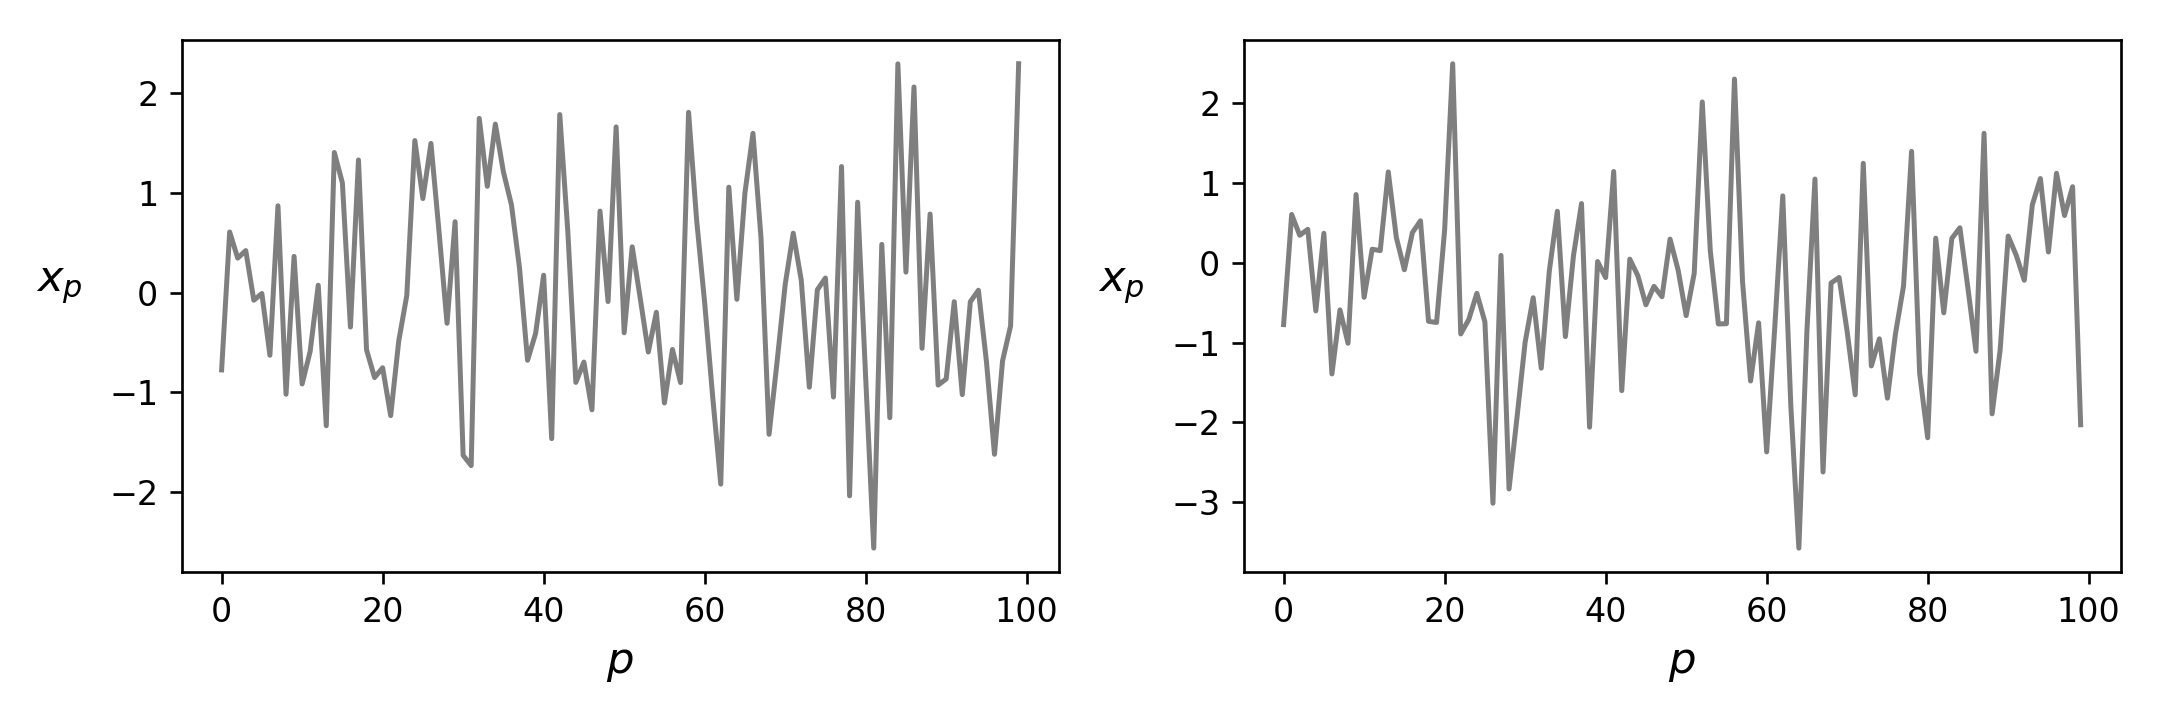

In [12]:
## This code cell will not be shown in the HTML version of this notebook
# function for autoregressive
def autoregressive(x,w):
    return w[0] + np.sum([a*b for a,b in zip(x,w[1:])])

# create a logistic sequence via for loop
num_elements = 100              # number of points to generate
D = 4
starter = 2*np.random.rand(D,1) - 1
x1 = [v for v in starter]
w1 = 0.5*np.random.randn(D,1)
for i in range(num_elements - D):
    x_new = autoregressive(x1[i:i + D],w1) + np.random.randn(1)
    x1.append(x_new)
    
x2 = [v for v in starter]
w2 = 0.5*np.random.randn(D,1)
for i in range(num_elements - D):
    x_new = autoregressive(x2[i:i + D],w2) + np.random.randn(1)
    x2.append(x_new)
    
### plot the result ###
fig = plt.figure(figsize = (9,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0]);
ax2 = plt.subplot(gs[1]); 

ax1.plot(x1,alpha = 0.5,c = 'k');
ax2.plot(x2,alpha = 0.5,c = 'k');  # plot lines connecting consecutive points for visualization purposes

# label axes
ax1.set_xlabel(r'$p$',fontsize = 13)
ax1.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)

ax2.set_xlabel(r'$p$',fontsize = 13)
ax2.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
plt.show()

#### <span style="color:#a50e3e;">Example 3. </span>  Logistic growth and chaotic systems

In this example we illustrate several examples of input data generated via the classical *logistic system*, defined as follows

\begin{equation}
\begin{array}
\
x_1 = \gamma \\
x_{p} = w x_{p-1}\left(1 - x_{p-1} \right).
\end{array}
\end{equation}

In other words, this is a dynamic system recurrence relation with update function  $f\left(x\right) = wx\left(1 - x\right)$.

It is called a *logistic system* because (like *logistic functions themselves*) it arises in the modeling of population growth under the assumption that resources in an environment are limited.  The modeling idea is basically this: if $x_p$ denotes the population of a single species of creature (e.g., bacterium, bunny rabbits, humans, whatever) in a closed system with a maximum amount of space / resources the growth rate of a population cannot follow the exponential rate detailed in the previous example forever.  In the beginning, when there are not too many of the creatures, the growth can indeed be exponential - thus the first part of the equation above $wx_{p-1}$ (the exponential growth we saw previously).  But at a certain point, when space and resources become limited, competition for survival causes the growth rate to slow down.  Here this concept is modeled by the second portion of the equation above: $\left(1 - x_{p-1}\right)$.  Here $1$ denotes the maximum population permitted by the limited resources of the environment (this could be set to some other number, but for simplicity we have left it at $1$).  As the population $x_p$ approaches this maximum level this second term tempers the exponential growth pursued by the first term, and the population levels off.  

For the right settings we can generate our familiar logistic 's' shape curve - as shown below for $P = 30$ points using an initialization of $x_1 = 10^{-4}$ and $w = 1.75$.

<IPython.core.display.Javascript object>


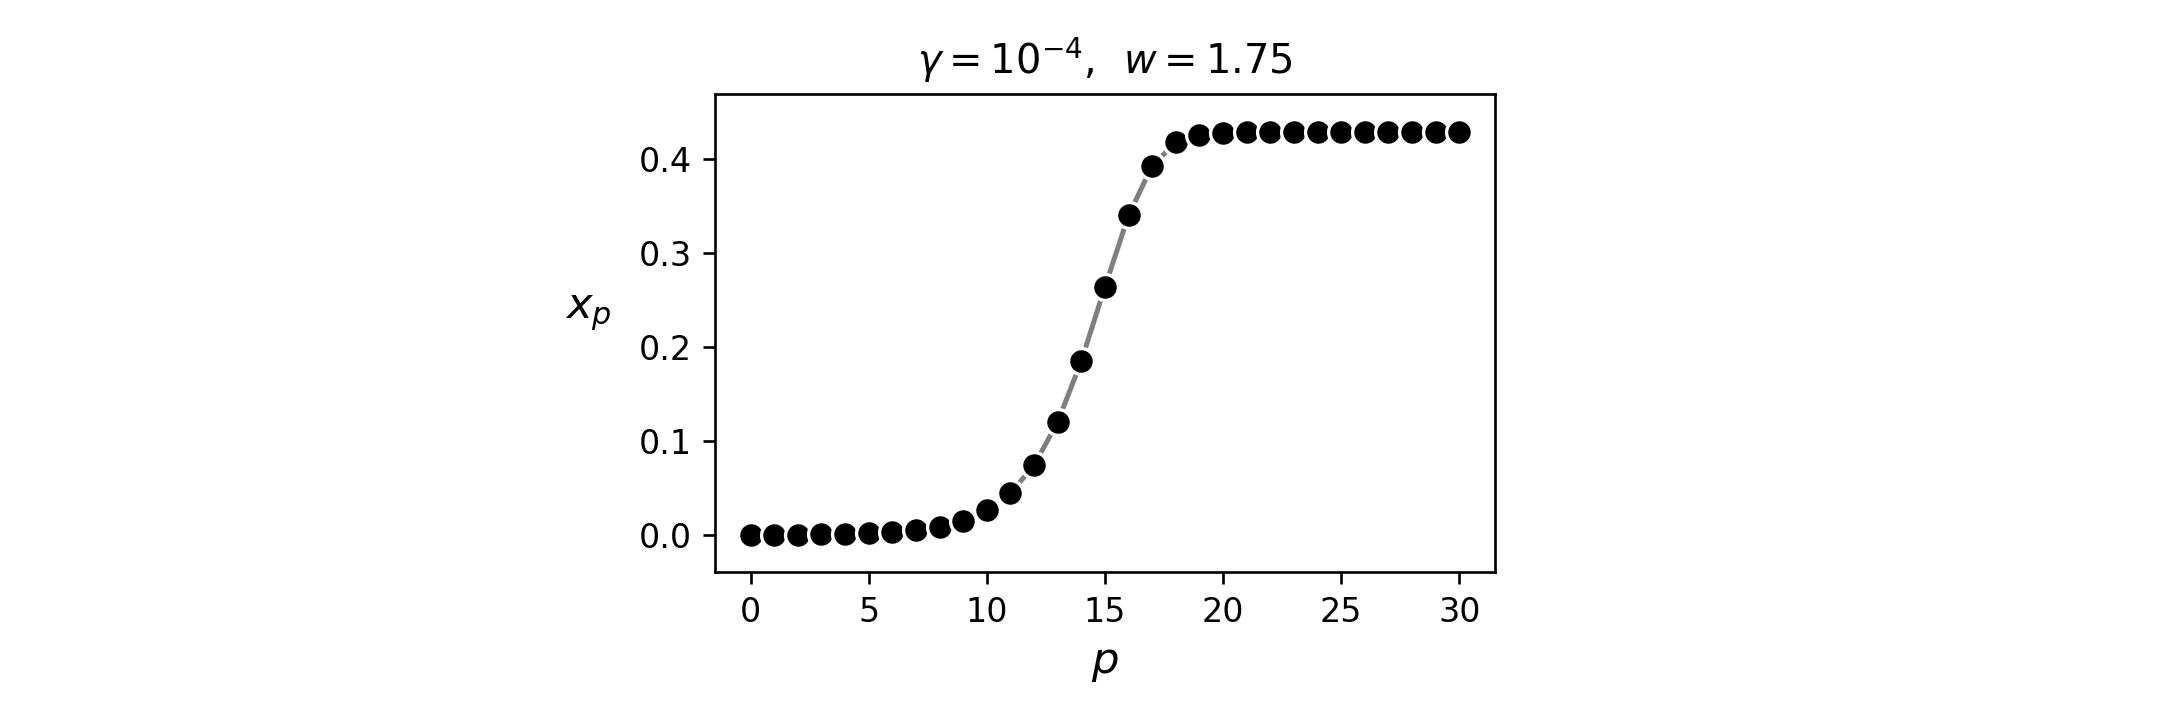

In [13]:
## This code cell will not be shown in the HTML version of this notebook
# logistic function
def logistic(x,w):
    return w*x - w*x**2

# we could use a for loop, but lets define 
# the logistic system programmatically
def f(x,w,n,seq):  # x = input point, n = desired number of compositions
    seq.append(x)
    if n > 1:
        return f(w*x - w*x**2,w,n-1,seq)
    else:
        seq.append(w*x - w*x**2)
        return seq
    
# create the same sequences using our recursive definition of the logistic system
sequence1 = f(0.0001,1.75,30,[]); 

# plot the result
fig = plt.figure(figsize = (9,3))
gs = gridspec.GridSpec(1, 3, width_ratios=[1,2,1]) 
ax = plt.subplot(gs[0]); ax.axis('off')
ax1 = plt.subplot(gs[1]); 
ax2 = plt.subplot(gs[2]); ax2.axis('off')

ax1.scatter(np.arange(len(sequence1)),sequence1,c = 'k',edgecolor = 'w',s = 60,linewidth = 1,zorder = 3);
ax1.plot(sequence1,alpha = 0.5,c = 'k');

# label axes
ax1.set_xlabel(r'$p$',fontsize = 13)
ax1.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
ax1.set_title(r'$\gamma = 10^{-4},\,\,\,w = 1.75$')
plt.show()

This dynamic system is often *chaotic* (being a prime exemplar in *chaos theory*) because slight adjustments to the initial condition and weight $w$ can produce drastically different sequences of data.  For example, below we show two sequences of length $P = 70$ generated via the system above.  In the left panel we have set the initial condition $\gamma = 10^{-4}$ and $w = 3$, and in the right we use the same initial condition and $w = 4$.  As you can see the form taken by the two resulting sequences is drastically different.  In the case on the left the resulting sequence converges nicely, while the latter sequence bounces around crazily (and will do so forever).  In fact the sequence on the right is *almost* random, a fact that [can be proven mathematically]([https://www.complexityexplorer.org/courses/22-introduction-to-dynamical-systems-and-chaos-winter-2015]).

<IPython.core.display.Javascript object>


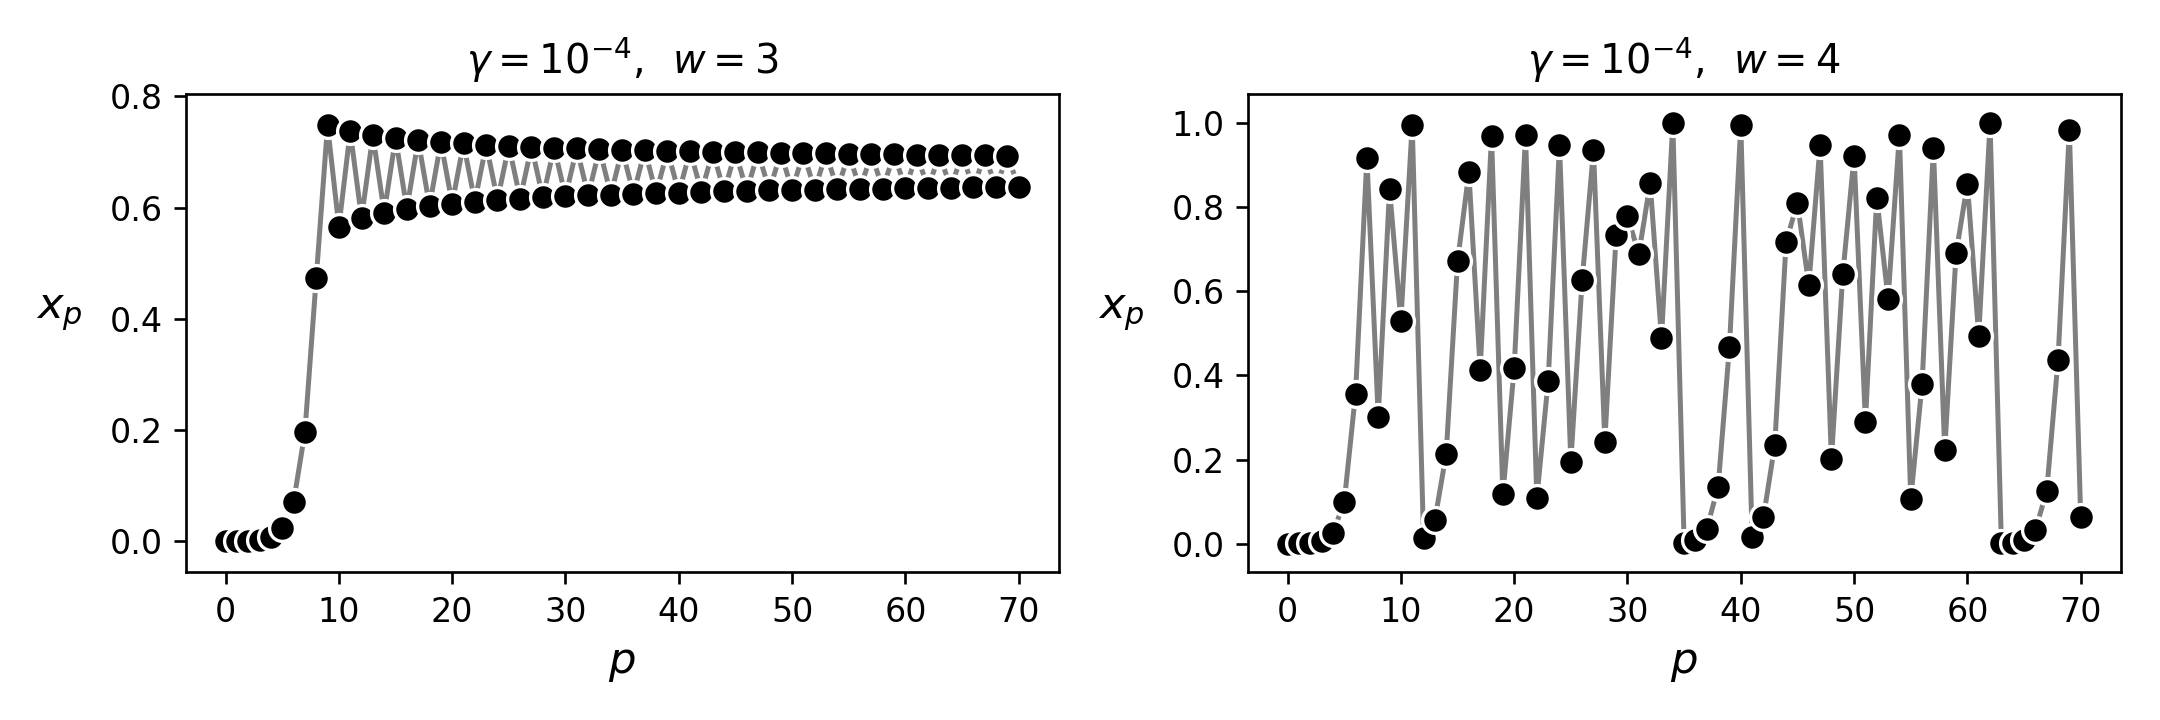

In [14]:
## This code cell will not be shown in the HTML version of this notebook
# create the same sequences using our recursive definition of the logistic system
sequence1 = f(0.0001,3,70,[]); sequence2 = f(0.0001,4,70,[]);

# plot the result
fig = plt.figure(figsize = (9,3))
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0]);
ax2 = plt.subplot(gs[1]); 

ax1.scatter(np.arange(len(sequence1)),sequence1,c = 'k',edgecolor = 'w',s = 60,linewidth = 1,zorder = 3);
ax2.scatter(np.arange(len(sequence2)),sequence2,c = 'k',edgecolor = 'w',s = 60,linewidth = 1,zorder = 3);
ax1.plot(sequence1,alpha = 0.5,c = 'k');
ax2.plot(sequence2,alpha = 0.5,c = 'k');  # plot lines connecting consecutive points for visualization purposes

# label axes
ax1.set_xlabel(r'$p$',fontsize = 13)
ax1.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
ax1.set_title(r'$\gamma = 10^{-4},\,\,\,w = 3$')

ax2.set_xlabel(r'$p$',fontsize = 13)
ax2.set_ylabel(r'$x_p$',fontsize = 13,rotation = 0,labelpad = 15)
ax2.set_title(r'$\gamma = 10^{-4},\,\,\,w = 4$')
plt.show()

#### <span style="color:#a50e3e;">Example 4. </span>  The Fibonachi Sequence

A classic example of a dynamic system of order $D = 2$ is the 

\begin{equation}
\begin{array}
\
x_1 = 0 \\
x_2 = 1 \\
x_{p} = x_{p-1} + x_{p-2}
\end{array}
\end{equation}

This sequence naturally creates a 'golden spiral' like the one shown below ([image credit](https://www.geeksforgeeks.org/program-for-nth-fibonacci-number/)).



<figure>
<p>
<img src= 'images/fibonacci_sequence.png' width="40%" height="40%" alt=""/>
</p>
<figcaption> <strong>Figure 1:</strong> <em> The geometry of the Fibonachi defines the so-called 'golden spiral'.

</em>
</figcaption>
</figure>

<a id='limited-memory'></a>
## The "Limited memory" of recurrence relations

The examples above - particularly Example 1 - showcase a universal property of the sort of basic recurrence relations we have seen here: their behavior is completely determined by their initial conditions - a fact that we easily confirm below.  This is why such systems are often called *chaotic*: because their behavior can change dramatically based on the setting of their initial condition(s).

If we closely analyze the update step for any generative dynamic system like those described above - which we will do here for an order $D = 1$ system for simplicity - we can see that *absolutely every point is directly related to the initial condition $x_1$*.  How?  As in Example 1, by 'rolling back' the system starting with the formula for $x_{p}$ 

\begin{equation}
x_{p} = f\left(x_{p-1}\right) 
\end{equation}

and then plugging in the mirroring formula for $x_{p-1}$ which is $x_{p-1} = f\left(x_{p-2}\right)$ we get

\begin{equation}
x_{p} = f\left(\,f\left(x_{p-2}\right)\right).
\end{equation}

If we continue to roll back, substituting in the same formula for $x_{p-2}$, and then $x_{p-3}$, etc., we can eventually represent the term $x_{p}$ strictly in terms of $x_1$ as 

\begin{equation}
x_{p} = f\left(\,f\left(\,\cdots f\left(x_1\right)\right)\cdots\right).
\end{equation}

Note here we compose $f$ with itself $p-1$ times, and could write it more compactly as $x_{p} = f^{(p-1)}\left(x_1\right)$.  So indeed we can see that every point created by such a recurrence relation is *completely determined by its initial condition*. 